In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from time import time
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score as f1_score_rep
from sklearn.metrics import accuracy_score

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

2024-01-15 07:00:39.489575: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 07:00:39.543978: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 07:00:39.544051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 07:00:39.545386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 07:00:39.553929: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 07:00:39.554569: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
x_test = np.load('/home/jovyan/Wustl_iiot/x_test.npy')
x_train = np.load('/home/jovyan/Wustl_iiot/x_train.npy')
x_val = np.load('/home/jovyan/Wustl_iiot/x_val.npy')
y_test = np.load('/home/jovyan/Wustl_iiot/y_test.npy')
y_train = np.load('/home/jovyan/Wustl_iiot/y_train.npy')
y_val = np.load('/home/jovyan/Wustl_iiot/y_val.npy')

In [3]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

input_shape = x_train.shape[1:]

num_classes = len(np.unique(y_train))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='valid', activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling1D())
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=3, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(lr=0.01) 

cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = cnn_model.fit(x_train, y_train, epochs=50, batch_size=64,
                     validation_data=(x_val, y_val), 
                     callbacks=[early_stopping])

test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = cnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-01-15 07:01:05.821304: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
11192/11192 [==============================] - 23s 2ms/step - loss: 0.0293 - accuracy: 0.9940 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 2/50
11192/11192 [==============================] - 22s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 3/50
11192/11192 [==============================] - 22s 2ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 4/50
11192/11192 [==============================] - 22s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 5/50
11192/11192 [==============================] - 22s 2ms/step - loss: 8.4459e-04 - accuracy: 0.9998 - val_loss: 9.2376e-04 - val_accuracy: 0.9998
Epoch 6/50
11192/11192 [==============================] - 21s 2ms/step - loss: 6.9209e-04 - accuracy: 0.9998 - val_loss: 7.4442e-04 - val_accuracy: 0.9998
Epoch 7/50
11192/11192 [==============================] - 22s 2ms/step - loss: 5.8890e-04 - accuracy: 

7462/7462 [==============================] - 8s 1ms/step
FPR: [4.18916598e-06 1.67573659e-05 0.00000000e+00 2.95227853e-05
 0.00000000e+00]
TPR: [0.9047619  0.88461538 0.99987229 1.         1.        ]
FNR: [0.0952381  0.11538462 0.00012771 0.         0.        ]
TNR: [0.99999581 0.99998324 1.         0.99997048 1.        ]
Precision: 0.9780258734216438
Accuracy: 0.999949738851449
F1-score: 0.9676098493587112
AUC: 0.9999986248976732
FPR: 1.0093863430502106e-05
tpr: 0.9578499167222748
fnr: 0.042150083277725195
tnr: 0.9999899061365696


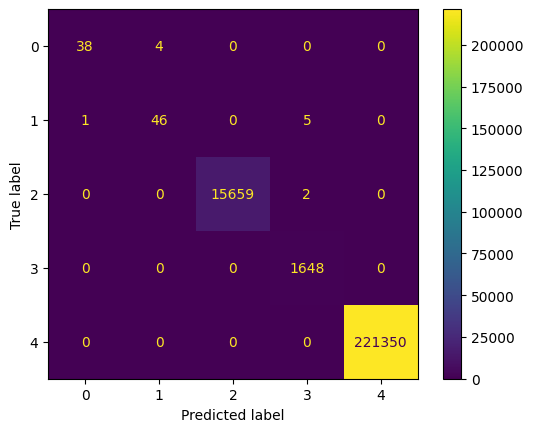

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score



conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_hat, average='macro')
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='macro')
auc = roc_auc_score(y_test, cnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()